# CENSUS INCOME DATA SET

This data set is taken from UCI Machine Learning Depository.
Source:https://archive.ics.uci.edu/ml/datasets/Census+Income
Our goal is to predict weather an individual earns more than 50k or not.
Lets start by importing essential packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
income_data = pd.read_csv( "census.csv")

In [3]:
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Cleaning the data #

In [4]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
income_data=income_data.replace(to_replace="?",value=np.nan)

In [6]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Cleaning Workclass Column#

In [7]:
income_data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [8]:
income_data['workclass'].isna().sum()

2799

In [9]:
income_data['workclass'].fillna('Private', inplace = True)

In [263]:
# We need to frst Categorize Occupation Column and then clean it

In [264]:
# Cleaning NativeCountry Column

In [10]:
income_data['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [11]:
income_data['native-country'].isna().sum()

857

In [12]:
income_data['native-country'].fillna('United-States', inplace = True)

In [13]:
# Transforming  Target Variable :
income_data['income_above_50K']=income_data['income'].map({'<=50K':0, '>50K':1})

## Exploratory Data Analysis #

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
def plotting(column):
    if income_data[column].dtype != 'int64':
        f, axes = plt.subplots(1,1,figsize=(15,5))
        sns.countplot(x=column, hue='income_above_50K', data = income_data)
        plt.xticks(rotation=90)
        plt.suptitle(column,fontsize=20)
        plt.show()
    else:
        g = sns.FacetGrid(income_data, row="income_above_50K", margin_titles=True, aspect=4, height=3)
        g.map(plt.hist,column,bins=100)
        plt.show()
    plt.show()

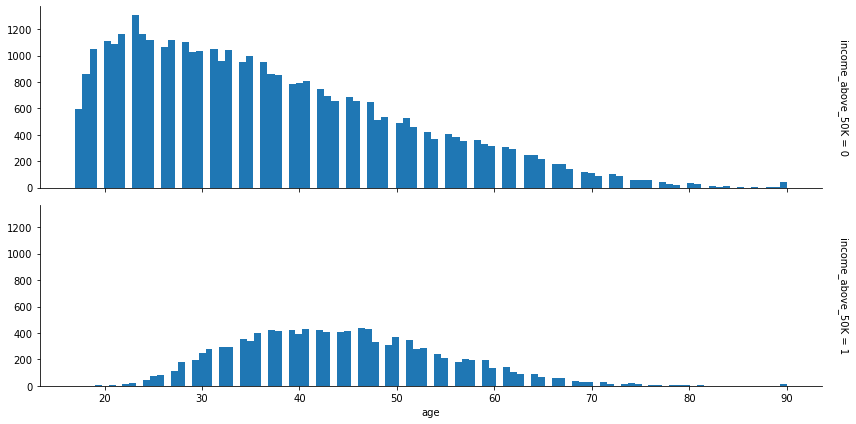

In [16]:
plotting('age')

In [273]:
# Right now we cannot interpret anything clearly but peoplw with income>50k are in middle age.

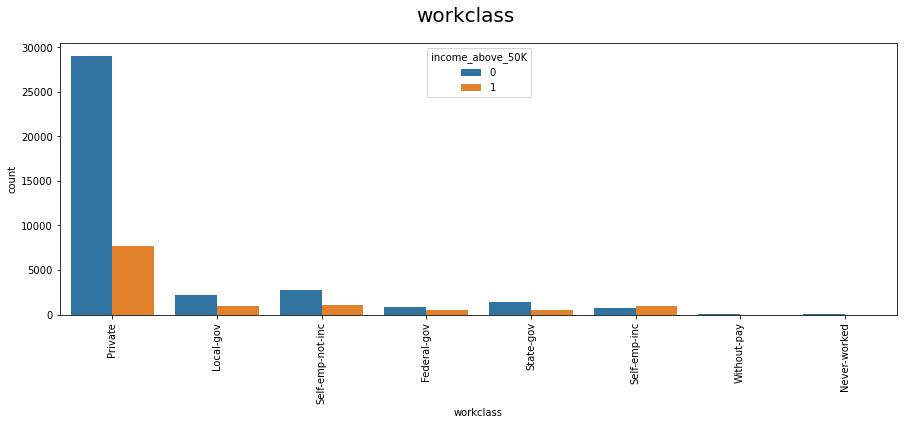

In [274]:
plotting('workclass')

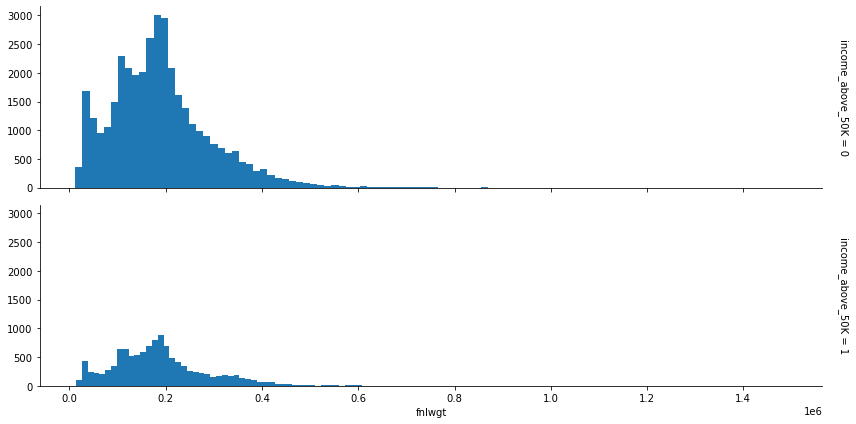

In [275]:
plotting('fnlwgt')

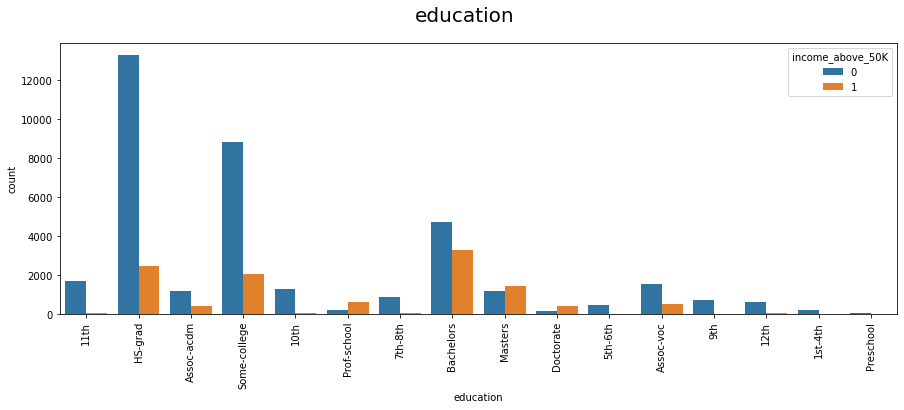

In [276]:
plotting('education')

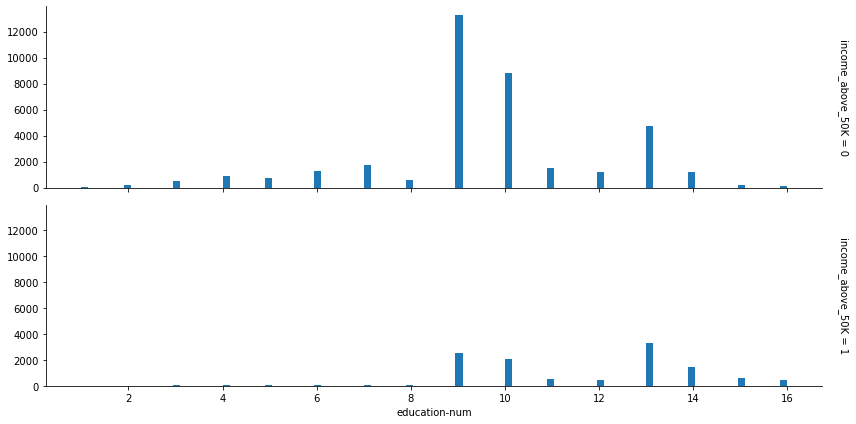

In [277]:
plotting('education-num')

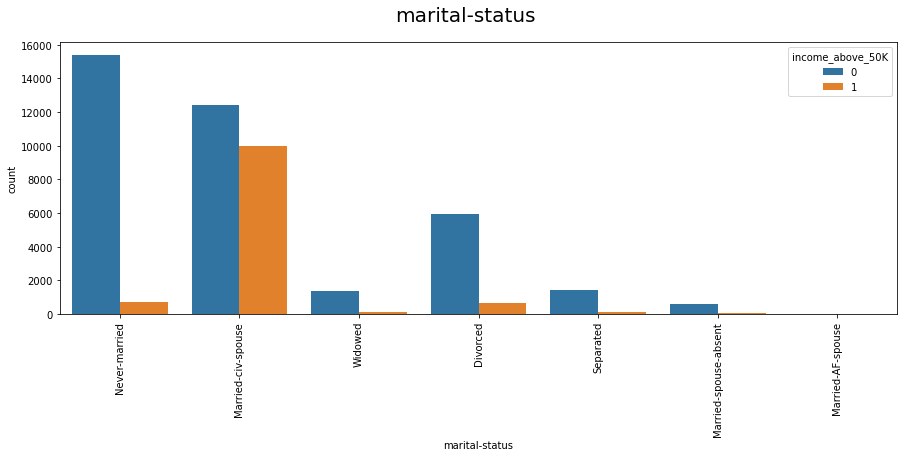

In [278]:
plotting('marital-status')

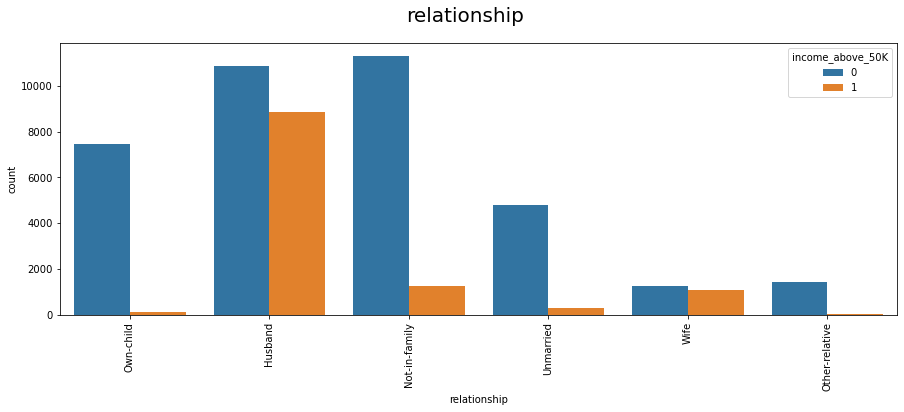

In [279]:
plotting('relationship')

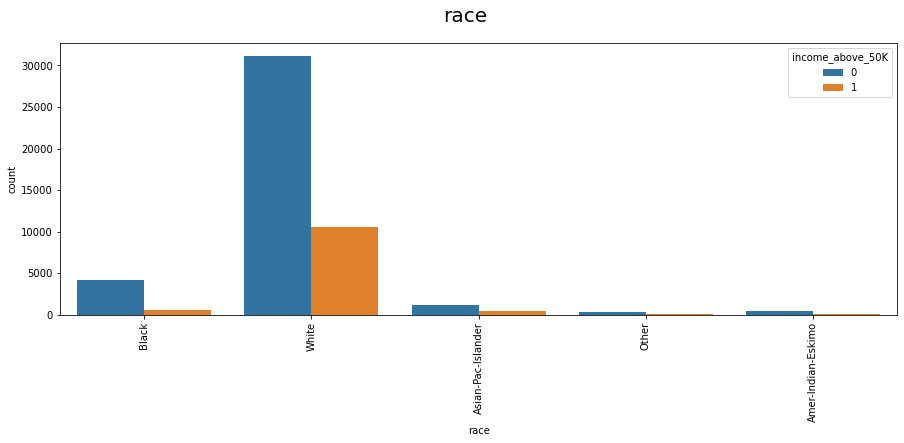

In [280]:
plotting('race')

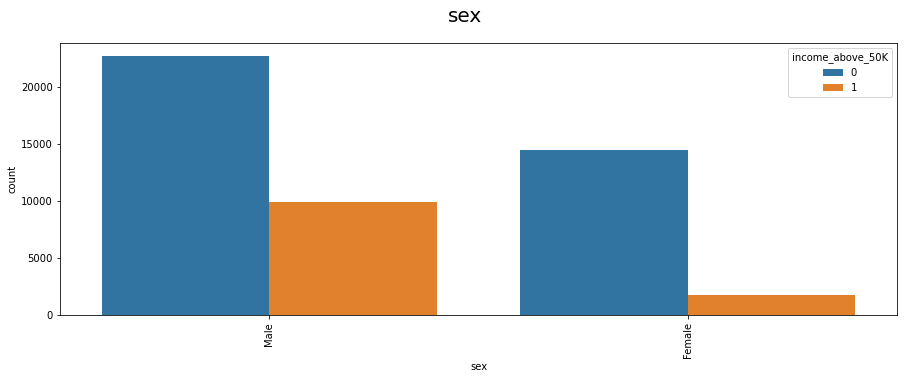

In [281]:
plotting('sex')

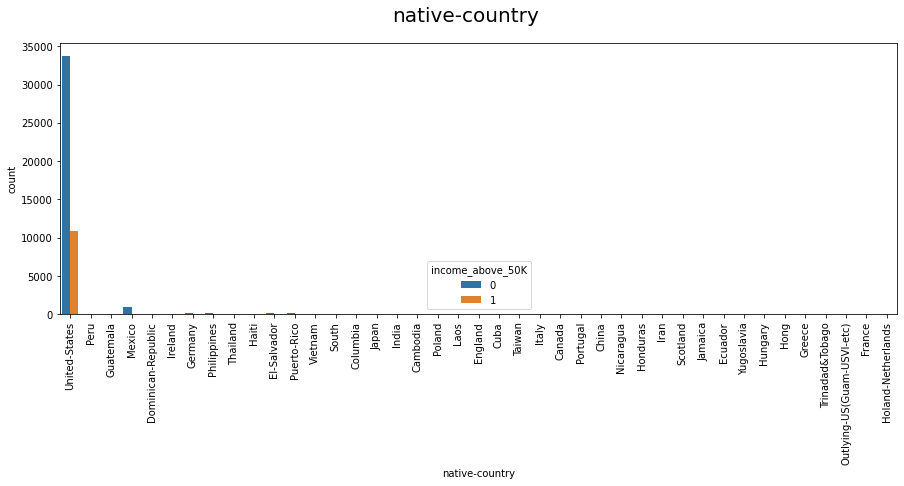

In [282]:
plotting('native-country')

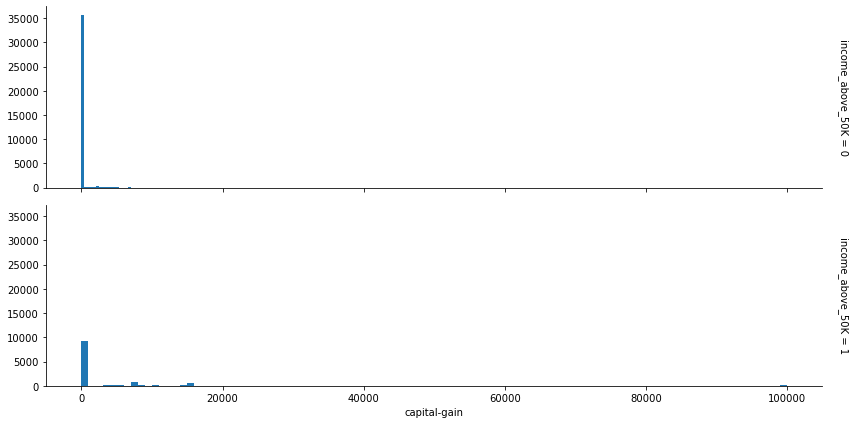

In [283]:
plotting('capital-gain')

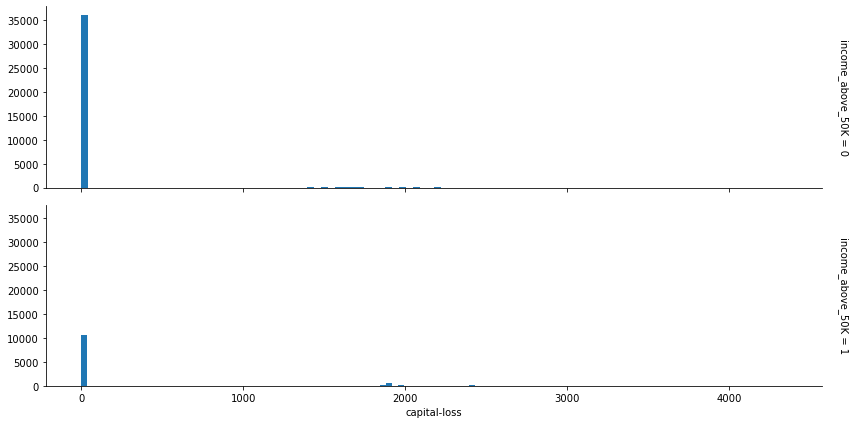

In [284]:
plotting('capital-loss')

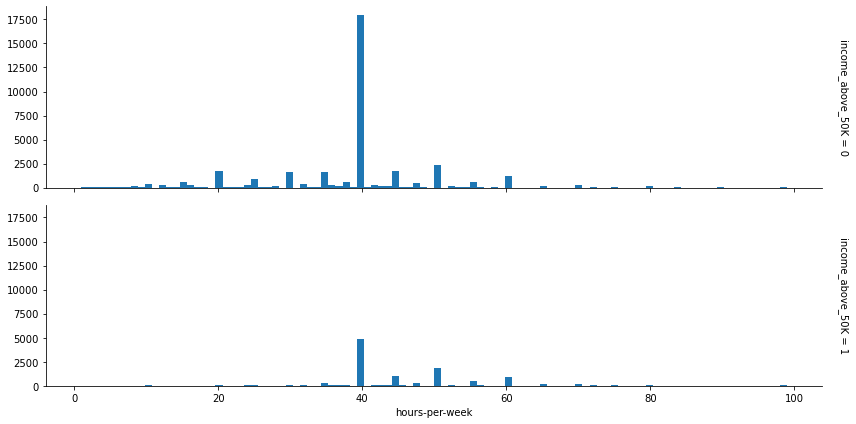

In [285]:
plotting('hours-per-week')

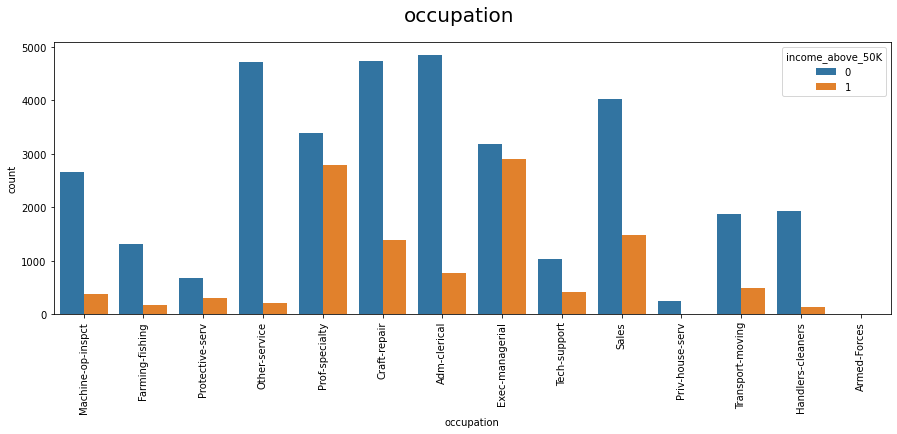

In [286]:
plotting('occupation')

In [17]:
Occu_over5ok=pd.DataFrame(income_data[income_data['income_above_50K']==1]['occupation'].value_counts())
Overallcount_by_occ=pd.DataFrame(income_data['occupation'].value_counts())
Table=pd.merge(Occu_over5ok,Overallcount_by_occ,left_index=True,right_index=True)
Table.rename(columns={'occupation_x':'income_over_50K','occupation_y':'Total number'}, inplace=True)
Table['percent_of_above_50K']=Table['income_over_50K']/(Table['Total number'])
Table=Table.sort_values(by='percent_of_above_50K',axis=0,ascending=False)
Table

,income_over_50K,Total number,percent_of_above_50K
Exec-managerial,2908,6086,0.477818
Prof-specialty,2784,6172,0.451069
Armed-Forces,5,15,0.333333
Protective-serv,308,983,0.313327
Tech-support,420,1446,0.290456
Sales,1475,5504,0.267987
Craft-repair,1383,6112,0.226276
Transport-moving,481,2355,0.204246
Adm-clerical,768,5611,0.136874
Machine-op-inspct,372,3022,0.123097


In [18]:
# We will use the Occupation Column in Data Transformation as:
#Top 30%- class_3
#Between 20-30 - class_2
#Below 20% - class-1

## Data Transformation:

In [19]:
# Transforming Sex Column
income_data['is_female']=income_data['sex'].map({'Male':0, 'Female':1})

In [20]:
# Transforming WorkClass Column
income_data['is_private']=income_data['workclass'].map({'Private':1})
income_data['is_private'].fillna(0, inplace=True)

In [21]:
# Transforming Education Column
income_data['education'] = income_data['education'].map(
        {'Preschool':'level_1','1st-4th':'level_1','5th-6th':'level_1','7th-8th':'level_1','9th':'level_1','10th':'level_1','11th':'level_1','12th':'level_1','HS-grad':'level_1',
        'Prof-school':'level_2','Assoc-acdm':'level_2','Assoc-voc':'level_2','Some-college':'level_2',
        'Bachelors':'level_3','Masters':'level_3','Doctorate':'level_3'})


In [22]:
# Transforming Marital-status Column
income_data['is_couple']=income_data['marital-status'].map({'Married-civ-spouse':1,'Never-married':0,'Divorced':0,'Separated':0,'Widowed':0,'Married-spouse-absent':0,'Married-AF-spouse':1})

In [23]:
# Transforming Occupation Column 
income_data['occupation']=income_data['occupation'].map(
    {'Exec-managerial':'class_3',
    'Prof-specialty':'class_3',
    'Armed-Forces':'class_3',
    'Protective-serv':'class_3',
    'Tech-support':'class_2',
    'Sales':'class_2',
    'Craft-repair':'class_2',
    'Transport-moving':'class_2',
    'Adm-clerical':'class_1',
    'Machine-op-inspct':'class_1',
    'Farming-fishing':'class_1',
    '?':'class_1',
    'Handlers-cleaners':'class_1',
    'Other-service':'class_1',
    'Priv-house-serv':'class_1'})

In [24]:
#Transforming race column 
income_data['is_white']=income_data['race'].map(
      {'Black':0, 'White':1, 'Asian-Pac-Islander':0, 'Other':0,'Amer-Indian-Eskimo':0})

In [25]:
#Transforming Native Country
income_data['native-country']=income_data['native-country'].map({'United-States':1})
income_data['native-country'].fillna(0, inplace=True)

In [26]:
# Create Dummies for Education
cols_education = pd.get_dummies(income_data['education'], prefix= 'education')
income_data[cols_education.columns] = cols_education
income_data.drop('education', axis = 1, inplace = True)

In [27]:
income_data['occupation'].value_counts()

class_1    17360
class_2    15417
class_3    13256
Name: occupation, dtype: int64

In [28]:
#Replacing Missing values in Occupation Column with more frequent class.
income_data['occupation'].fillna('class_1', inplace = True)
#Create Dummies for Occupation
cols_occupation = pd.get_dummies(income_data['occupation'], prefix= 'occupation')
income_data[cols_occupation.columns] = cols_occupation
income_data.drop('occupation', axis = 1, inplace = True)

In [29]:
# Dropping some coloumns
  
income_data.drop(labels=['income','sex','workclass','marital-status','relationship','race'],axis=1,inplace=True)

In [30]:
income_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,income_above_50K,is_female,is_private,is_couple,is_white,education_level_1,education_level_2,education_level_3,occupation_class_1,occupation_class_2,occupation_class_3
0,25,226802,7,0,0,40,1.0,0,0,1.0,0,0,1,0,0,1,0,0
1,38,89814,9,0,0,50,1.0,0,0,1.0,1,1,1,0,0,1,0,0
2,28,336951,12,0,0,40,1.0,1,0,0.0,1,1,0,1,0,0,0,1
3,44,160323,10,7688,0,40,1.0,1,0,1.0,1,0,0,1,0,1,0,0
4,18,103497,10,0,0,30,1.0,0,1,1.0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,1.0,0,1,1.0,1,1,0,1,0,0,1,0
48838,40,154374,9,0,0,40,1.0,1,0,1.0,1,1,1,0,0,1,0,0
48839,58,151910,9,0,0,40,1.0,0,1,1.0,0,1,1,0,0,1,0,0
48840,22,201490,9,0,0,20,1.0,0,0,1.0,0,1,1,0,0,1,0,0


In [31]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 48842 non-null  int64  
 1   fnlwgt              48842 non-null  int64  
 2   education-num       48842 non-null  int64  
 3   capital-gain        48842 non-null  int64  
 4   capital-loss        48842 non-null  int64  
 5   hours-per-week      48842 non-null  int64  
 6   native-country      48842 non-null  float64
 7   income_above_50K    48842 non-null  int64  
 8   is_female           48842 non-null  int64  
 9   is_private          48842 non-null  float64
 10  is_couple           48842 non-null  int64  
 11  is_white            48842 non-null  int64  
 12  education_level_1   48842 non-null  uint8  
 13  education_level_2   48842 non-null  uint8  
 14  education_level_3   48842 non-null  uint8  
 15  occupation_class_1  48842 non-null  uint8  
 16  occu

In [ ]:
### There are no missing values in the columns and I can use this data for Classification Models


### Splitting the Data:

In [ ]:
X = income_data.drop('income_above_50K',axis = 1)
y = income_data['income_above_50K']

In [306]:
X.shape

(48842, 17)

In [307]:
y.shape

(48842,)

In [309]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [310]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### KNN CLASSIFIER

In [311]:

from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

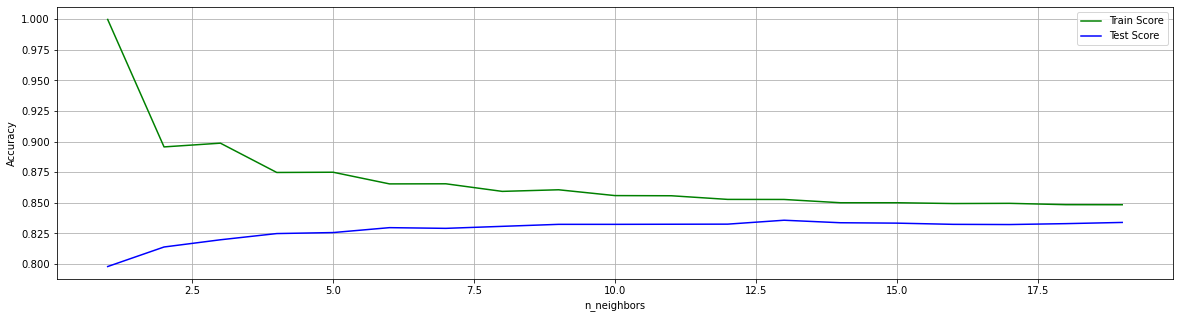

In [314]:
x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [327]:
from sklearn.model_selection import GridSearchCV

In [317]:
knn2 = KNeighborsClassifier()
ki = np.arange(20)+1
param_knn2= [{'n_neighbors':ki}]
k_clfr = GridSearchCV(knn2, param_knn2, cv=5)
k_clfr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}])

In [318]:
from sklearn.metrics import classification_report

In [319]:
print("The Best parameters: {}".format(k_clfr.best_params_))
print("The Best Score: {}".format(k_clfr.best_score_))

The Best parameters: {'n_neighbors': 20}
The Best Score: 0.8335563276466784


In [320]:
knn20 = KNeighborsClassifier(20)
knn20.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [322]:
knn20_predict1 = knn20.predict(X_test)

In [323]:
print(classification_report(y_test, knn20_predict1))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      9273
           1       0.71      0.52      0.60      2938

    accuracy                           0.83     12211
   macro avg       0.79      0.73      0.75     12211
weighted avg       0.82      0.83      0.82     12211



In [348]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,knn20_predict1)
cm

array([[8662,  611],
       [1411, 1527]], dtype=int64)

In [ ]:
#Accuracy is 0.83

### Logistic Regression

In [328]:
from sklearn.linear_model import LogisticRegression

In [331]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

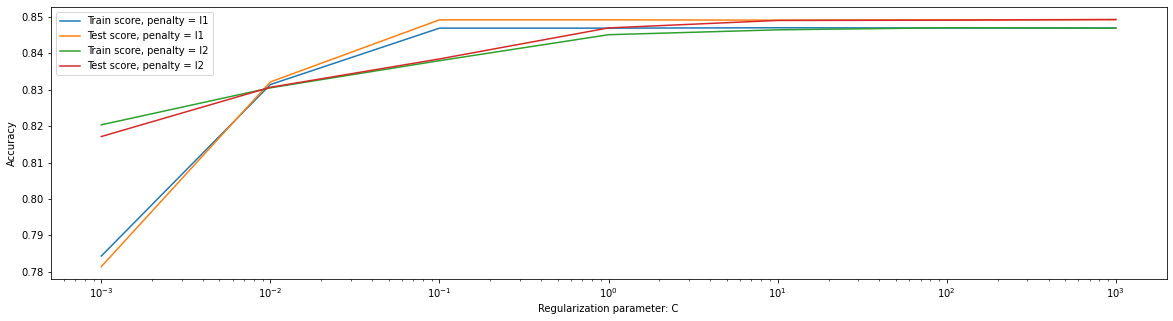

In [332]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [ ]:
# best parameters are c=0.1,penality=l1;

In [335]:
LR1 = LogisticRegression(penalty = 'l1', C= 0.1,solver = 'liblinear', max_iter = 500)
LR1.fit(X_train,y_train)
print('Trainig set Accuracy (Logistic Regression) {:.4f}'.format(LR1.score(X_train, y_train)))
print('Test set Accuracy (Logistic Regression): {:.4f}'.format(LR1.score(X_test, y_test)))


Trainig set Accuracy (Logistic Regression) 0.8469
Test set Accuracy (Logistic Regression): 0.8491


In [336]:
logist_predict1 = LR1.predict(X_test)
print(classification_report(y_test, logist_predict1))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      9273
           1       0.74      0.58      0.65      2938

    accuracy                           0.85     12211
   macro avg       0.81      0.76      0.78     12211
weighted avg       0.84      0.85      0.84     12211



In [339]:
cm1 = metrics.confusion_matrix(y_test,logist_predict1)
cm1

array([[8658,  615],
       [1228, 1710]], dtype=int64)

In [ ]:
# We have an Accuracy of 0.84

### Decision Tree

In [350]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC

In [351]:
dtree_clfr = DecisionTreeClassifier()
parm = {'max_depth': [5, 10, 20, 50, 100]}

In [352]:
#gridsearch 
gs_dt = GridSearchCV(dtree_clfr, parm, cv = 5, return_train_score=True)
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20, 50, 100]},
             return_train_score=True)

In [353]:
print("The Best parameters are: {}".format(gs_dt.best_params_))
print("The Best Score is : {}".format(gs_dt.best_score_))

The Best parameters are: {'max_depth': 10}
The Best Score is : 0.8583439997934332


In [354]:
dtree_c = DecisionTreeClassifier(max_depth = 5)
dtree_c.fit(X_train,y_train)
dtree_c_pred = dtree_c.predict(X_test)

In [356]:
print("Accuracy on training set: {:.3f}".format(dtree_c.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree_c.score(X_test, y_test)))

Accuracy on training set: 0.850
Accuracy on test set: 0.850


In [357]:
print(classification_report(y_test,dtree_c_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      9273
           1       0.76      0.55      0.64      2938

    accuracy                           0.85     12211
   macro avg       0.81      0.75      0.77     12211
weighted avg       0.84      0.85      0.84     12211



In [358]:
cm2 = metrics.confusion_matrix(y_test,dtree_c_pred)
cm2

array([[8762,  511],
       [1322, 1616]], dtype=int64)

In [ ]:
#We have an accuracy of 0.85

### Linear SVC

In [ ]:
#Grid Search
parm = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gs_svm = GridSearchCV(LinearSVC(), parm, return_train_score=True,cv=5)
gs_svm.fit(X_train,y_train)
print(gs_svm.best_params_)

In [370]:
svm = LinearSVC(C=1)

In [371]:
svm.fit(X_train,y_train)
svm_pre2 = svm.predict(X_test)

In [372]:
print(classification_report(y_test,svm_pre2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9273
           1       0.74      0.58      0.65      2938

    accuracy                           0.85     12211
   macro avg       0.81      0.76      0.78     12211
weighted avg       0.84      0.85      0.84     12211



In [373]:
cm3 = metrics.confusion_matrix(y_test,svm_pre2)
cm3

array([[8674,  599],
       [1248, 1690]], dtype=int64)

In [ ]:
# Accuracy is 0.85

### Kernel SVC

In [368]:
Kernel_SVC1 = SVC(max_iter=10000)
Kernel_SVC1_parms = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[1,0.1,0.001], 'kernel':['rbf','linear','poly']}

In [ ]:
# I am not able to run Kernel-SVC due to  Time Constriant .It is taking lot of time.

In [ ]:
Kernel_SVC1_clfr = GridSearchCV(Kernel_SVC1, Kernel_SVC1_parms,cv=5)
Kernel_SVC1_clfr.fit(X_train,y_train)

##### So out of all the models the best model is Decision Tree Classifier.